In [3]:
# pacotes comuns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#Pacotes de machine learn
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
boston = fetch_openml(name="boston", version=1)

In [6]:
#Ignorar avisos
import warnings
warnings.filterwarnings("ignore");

In [7]:
#X variavei explicativas
x = pd.DataFrame(boston.data, columns=boston.feature_names);
#Y Variavel de explicação
y = boston.target;

In [38]:
dados = x.copy();
dados["preco"] = y;

In [40]:
print(dados);

        CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   

     PTRATIO       B  LSTAT  preco  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.14   21.6  
2       17.8

In [15]:
def eqm(y_verdadeir, y_Previsto) : 
    """
    Input: Dois vetores com a mesma dimenção
    Output: Escalar com o erro quadrático médio
    """
    return np.mean(np.square(y_verdadeir-y_Previsto));

In [44]:
model = RandomForestRegressor();
model.fit(x, y);
x["preco_previsto"] = model.predict(x);

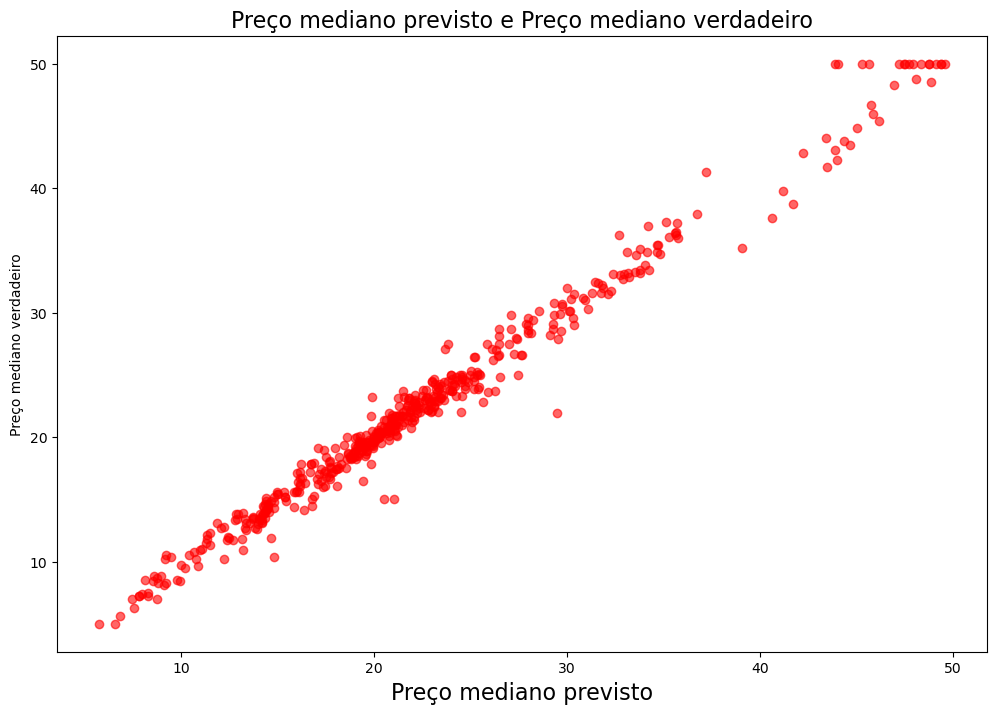

In [48]:
plt.figure(figsize = (12,8));
plt.scatter(x['preco_previsto'], y, c="r", alpha=0.6);
plt.title('Preço mediano previsto e Preço mediano verdadeiro', fontsize = 16);
plt.xlabel("Preço mediano previsto", fontsize = 16);
plt.ylabel("Preço mediano verdadeiro");
plt.show();

In [8]:
X_treino, X_dev, Y_treino, Y_dev = train_test_split(x, y, test_size=0.3, random_state=42);
X_val, X_teste, Y_val, Y_teste = train_test_split(X_dev, Y_dev, test_size=0.5, random_state=42);

In [9]:
variaveis = X_treino.columns

In [18]:
modelo1 = RandomForestRegressor(max_depth=2,random_state=12);
modelo1.fit(X_treino[variaveis], Y_treino);
X_treino["preco_previsto_1"] = modelo1.predict(X_treino[variaveis]);
X_val["preco_previsto_1"] = modelo1.predict(X_val[variaveis]);

In [32]:
modelo2 = RandomForestRegressor(max_depth=10,random_state=12);
modelo2.fit(X_treino[variaveis], Y_treino);
X_treino["preco_previsto_2"] = modelo2.predict(X_treino[variaveis]);
X_val["preco_previsto_2"] = modelo2.predict(X_val[variaveis]);

In [20]:
modelo3 = RandomForestRegressor(max_depth=None,random_state=12);
modelo3.fit(X_treino[variaveis], Y_treino);
X_treino["preco_previsto_3"] = modelo3.predict(X_treino[variaveis]);
X_val["preco_previsto_3"] = modelo3.predict(X_val[variaveis]);

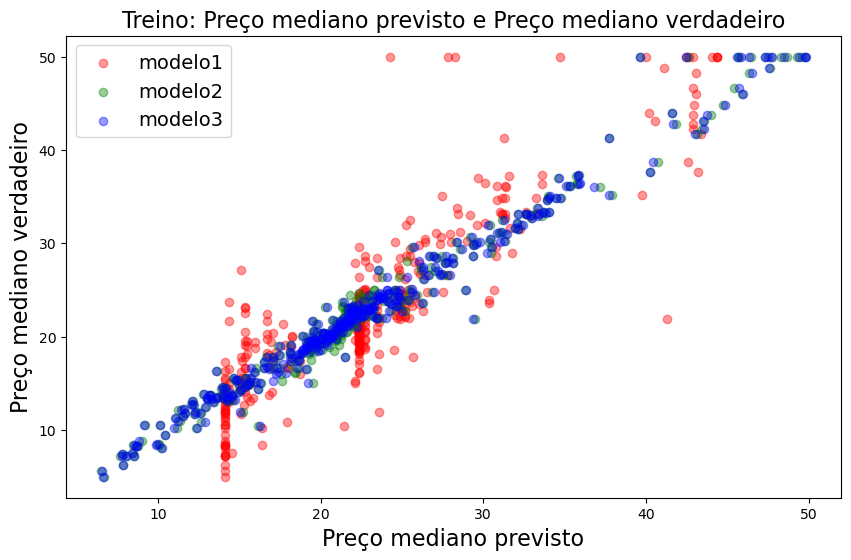

EQM da validação no modelo 1 foi de:  10.543105399855548
EQM da validação no modelo 2 foi de:  6.314810779275074
EQM da validação no modelo 3 foi de:  6.406750407894731


In [33]:
plt.figure(figsize = (10,6));
plt.scatter(X_treino['preco_previsto_1'], Y_treino, c="r", alpha=0.4, label="modelo1");
plt.scatter(X_treino['preco_previsto_2'], Y_treino, c="g", alpha=0.4, label="modelo2");
plt.scatter(X_treino['preco_previsto_3'], Y_treino, c="b", alpha=0.4, label="modelo3");
plt.title('Treino: Preço mediano previsto e Preço mediano verdadeiro', fontsize = 16);
plt.xlabel("Preço mediano previsto", fontsize = 16);
plt.ylabel("Preço mediano verdadeiro", fontsize = 16);
plt.legend(fontsize=14);
plt.show();

novo_EQM_val1 = eqm(X_val['preco_previsto_1'], Y_val);
novo_EQM_val2 = eqm(X_val['preco_previsto_2'], Y_val);
novo_EQM_val3 = eqm(X_val['preco_previsto_3'], Y_val);

print("EQM da validação no modelo 1 foi de: ", novo_EQM_val1);
print("EQM da validação no modelo 2 foi de: ", novo_EQM_val2);
print("EQM da validação no modelo 3 foi de: ", novo_EQM_val3);

In [34]:
X_teste["preco_previsto"] = modelo2.predict(X_teste[variaveis]);

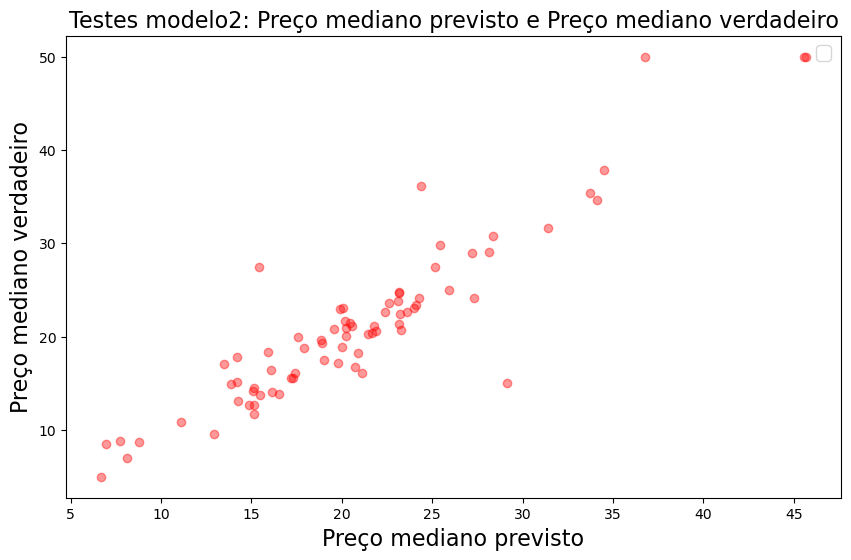

EQM do conjunto testes foi de:  12.80363866720476


In [36]:
plt.figure(figsize = (10,6));
plt.scatter(X_teste["preco_previsto"], Y_teste, c="r", alpha=0.4);
plt.title('Testes modelo2: Preço mediano previsto e Preço mediano verdadeiro', fontsize = 16);
plt.xlabel("Preço mediano previsto", fontsize = 16);
plt.ylabel("Preço mediano verdadeiro", fontsize = 16);
plt.legend(fontsize=14);
plt.show();
novo_EQM_Testes = eqm(X_teste["preco_previsto"], Y_teste);
print("EQM do conjunto testes foi de: ", novo_EQM_Testes);